In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Wine_clust .csv')

In [ ]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
x=data.iloc[:,[11,12]].values

In [ ]:
# Find the optimum number of clusters in each model and create the model


# **KMeans Clustering**

In [ ]:
#Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

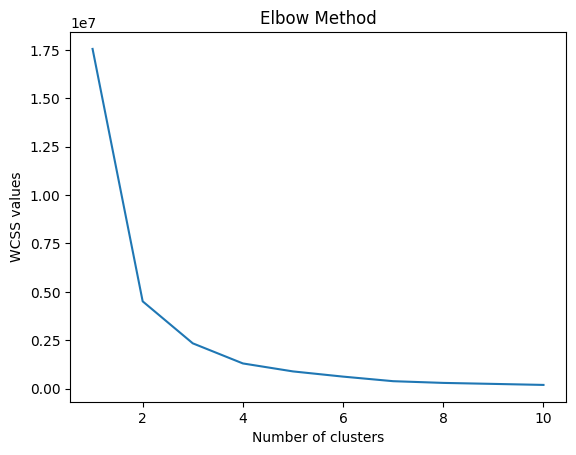

In [ ]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

 Create the KMeans model with the optimal number of clusters.


In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_KMeans= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_KMeans

array([4, 4, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 0, 0, 0,
       4, 4, 0, 0, 4, 1, 0, 4, 1, 1, 4, 1, 4, 0, 0, 4, 4, 0, 0, 4, 4, 3,
       0, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 0, 3, 0, 2, 2, 4, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       0, 3], dtype=int32)

# Visualize the clusters


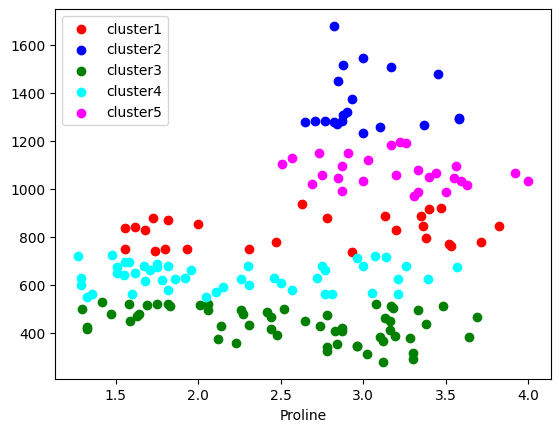

In [ ]:
plt.scatter(x[y_KMeans ==0,0], x[y_KMeans ==0,1],c='red',label='cluster1')
plt.scatter(x[y_KMeans == 1, 0], x[y_KMeans == 1, 1], c='blue', label='cluster2')
plt.scatter(x[y_KMeans == 2, 0], x[y_KMeans == 2, 1], c='green', label='cluster3')
plt.scatter(x[y_KMeans == 3, 0], x[y_KMeans == 3, 1], c='cyan', label='cluster4')
plt.scatter(x[y_KMeans == 4, 0], x[y_KMeans == 4, 1], c='magenta', label='cluster5')
plt.xlabel('Proline')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x,y_KMeans)
print(sil)

0.5660834218463116


# Agglomerative clustering**

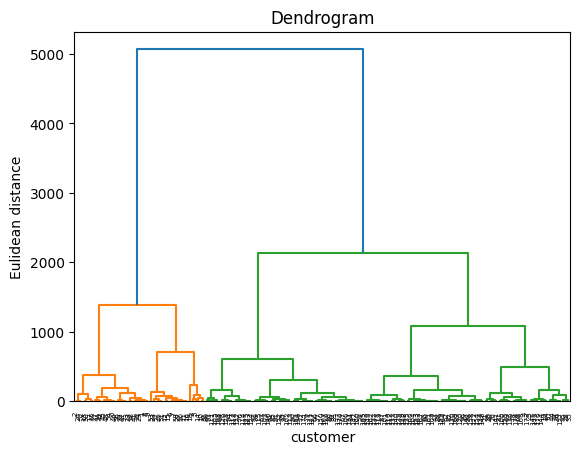

In [ ]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage (x,method="ward"))
plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('Eulidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =3,metric ='euclidean',linkage='ward')
y_hc= hc.fit_predict(x)

In [ ]:
y_hc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1])

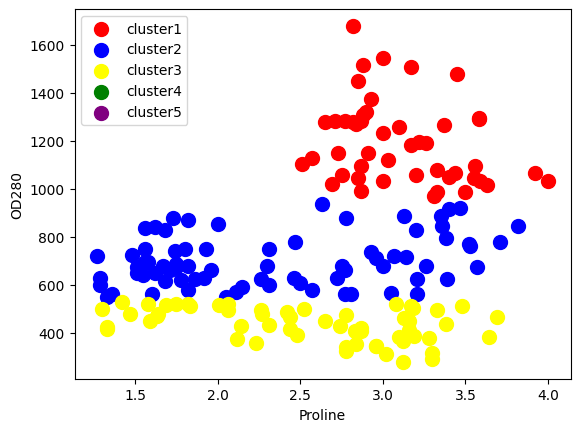

In [ ]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='yellow',label='cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='green',label='cluster4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='purple',label='cluster5')
plt.title('')
plt.xlabel('Proline')
plt.ylabel('OD280')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x,y_hc)
print(sil)

0.5651908644787632


In [ ]:
# **DBSCAN Clustering**


In [ ]:
from sklearn.cluster import DBSCAN

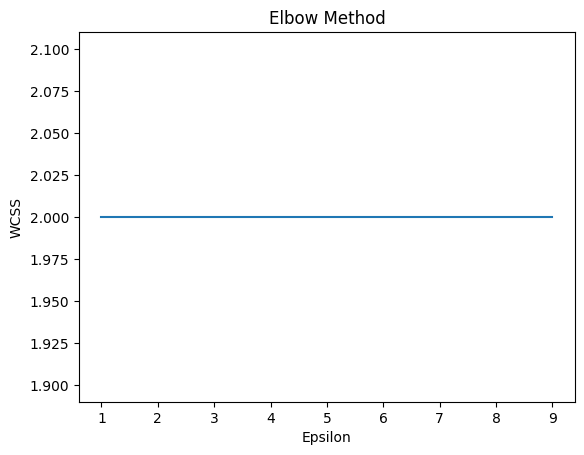

In [ ]:
wcss = []
for eps in range(1, 10):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(x)
    wcss.append(dbscan.n_features_in_)

plt.plot(range(1, 10), wcss)
plt.xlabel("Epsilon")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [ ]:
dbscan = DBSCAN(eps=eps, min_samples=5, n_jobs=2)
y_dbscan= dbscan.fit_predict(x)

In [ ]:
y_dbscan

array([-1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  2,  1, -1,  3,  4, -1,  1,  2,  2,
       -1,  5, -1,  4,  2, -1, -1,  4,  7,  2, -1,  2, -1,  5,  3,  2,  2,
       -1,  2,  6,  1,  3,  2, -1,  2, -1, -1, -1,  3,  4, -1,  4,  5,  6,
       -1,  4,  1, -1,  2,  2, -1,  1,  6, -1, -1,  4,  7,  4,  2, -1,  7,
        6,  3,  2,  7,  7,  7,  7, -1,  2, -1, -1,  3, -1,  6, -1, -1, -1,
        5,  2, -1, -1, -1, -1,  2, -1, -1, -1,  4,  3, -1, -1,  2,  2,  4,
        1, -1,  5,  2, -1, -1,  3,  2,  1,  6,  1,  3,  2, -1,  1, -1,  3,
        2,  2, -1, -1, -1, -1, -1,  6])

In [ ]:
## Visualize the clusters


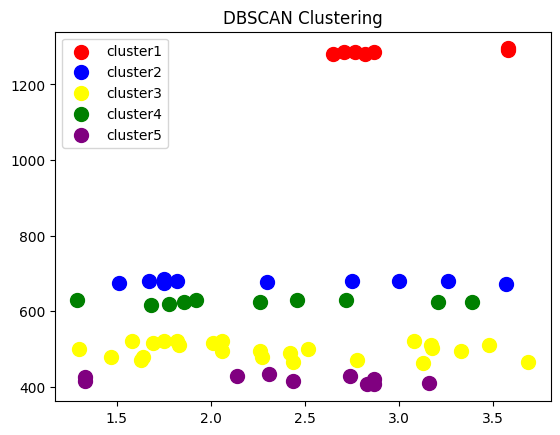

In [ ]:
plt.scatter(x[y_dbscan==0,0],x[y_dbscan==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_dbscan==1,0],x[y_dbscan==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_dbscan==2,0],x[y_dbscan==2,1],s=100,c='yellow',label='cluster3')
plt.scatter(x[y_dbscan==3,0],x[y_dbscan==3,1],s=100,c='green',label='cluster4')
plt.scatter(x[y_dbscan==4,0],x[y_dbscan==4,1],s=100,c='purple',label='cluster5')
plt.title('DBSCAN Clustering')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(x,y_dbscan)
print(sil)

-0.013304336736835959
